**Overview**
------------------------

-------------------------

Welcome to my analysis of the data job market, focusing on data analyst roles. This project was created out of a desire to navigate and understand the job market more effectively. It delves into the top-paying and in-demand skills to help find optimal job opportunities for data analysts.

The data sourced from Luke Barousse's Python Course which provides a foundation for my analysis, containing detailed information on job titles, salaries, locations, and essential skills. Through a series of Python scripts, I explore key questions such as the most demanded skills, salary trends, and the intersection of demand and salary in data analytics.

------------------------

**Goal**
-------------
------------
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

**Questions to Answer**
-------------
-------------
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

-------------
**Import & Clean Up Data**
-------------------------------
----------------------------------
I start by importing necessary libraries and loading the dataset, followed by initial data cleaning tasks to ensure data quality.

**Roles to Explore**

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

d:\Anaconda\App\envs\pythoncourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

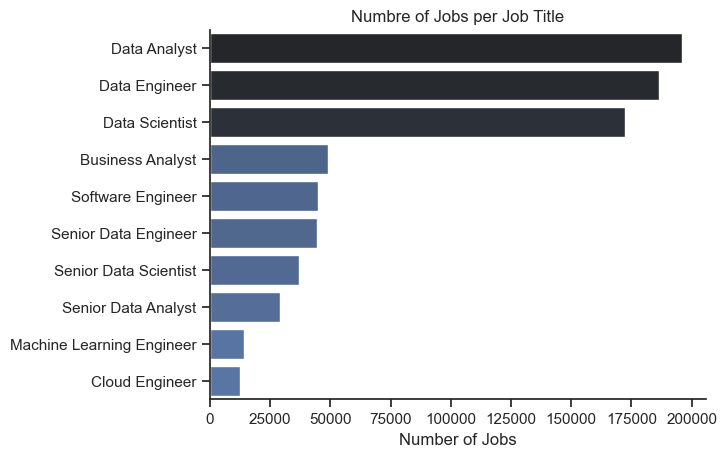

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style="ticks")
sns.barplot(data = df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Numbre of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

**Countries to Explore**

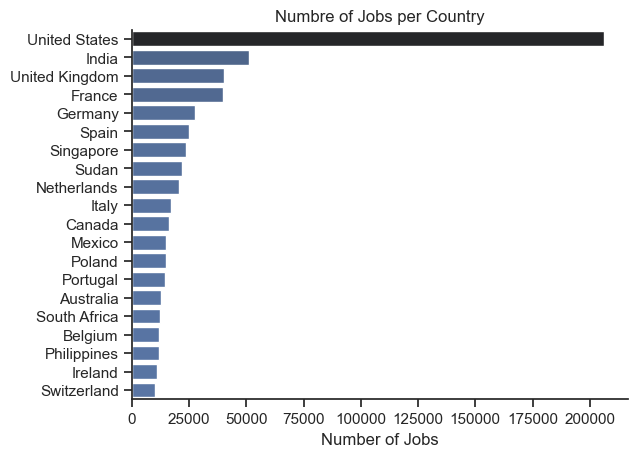

In [6]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style="ticks")
sns.barplot(data = df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Numbre of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

**Companies to Explore**

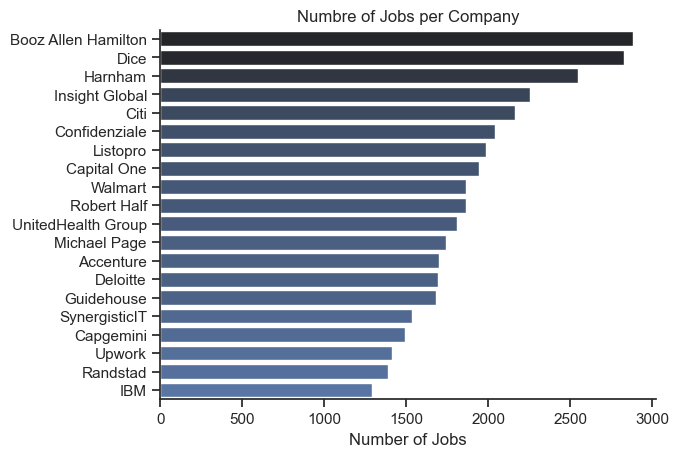

In [7]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style="ticks")
sns.barplot(data = df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Numbre of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

**Job Opportunities**

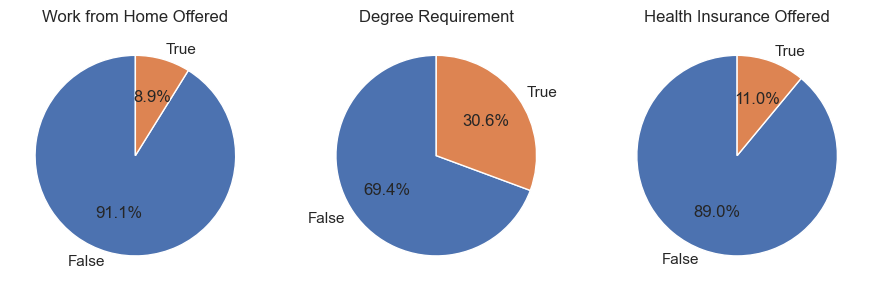

In [11]:
dict_column ={
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
    
plt.show()